In [1]:
# Load all the required libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statistics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from statsmodels.tsa.filters.hp_filter import hpfilter

%matplotlib inline

import seaborn as sns
from plotly import graph_objects as go
import plotly.express as px
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels

import scipy.stats as st
import matplotlib.dates as mdates
import matplotlib.ticker as ticker

from datetime import datetime

In [2]:
data = pd.read_excel("Sea level data/Mumbai_India.xlsx", 
                               header=0, 
                               index_col=[0],
                               parse_dates=[0])

In [3]:
data.head()

,sea_level
time,
1878.0416,6892
1878.1250,6974
1878.2084,6974
1878.2916,6998
1878.3750,7020


# Linear regression

0.6790348891892354 5698.680121196309


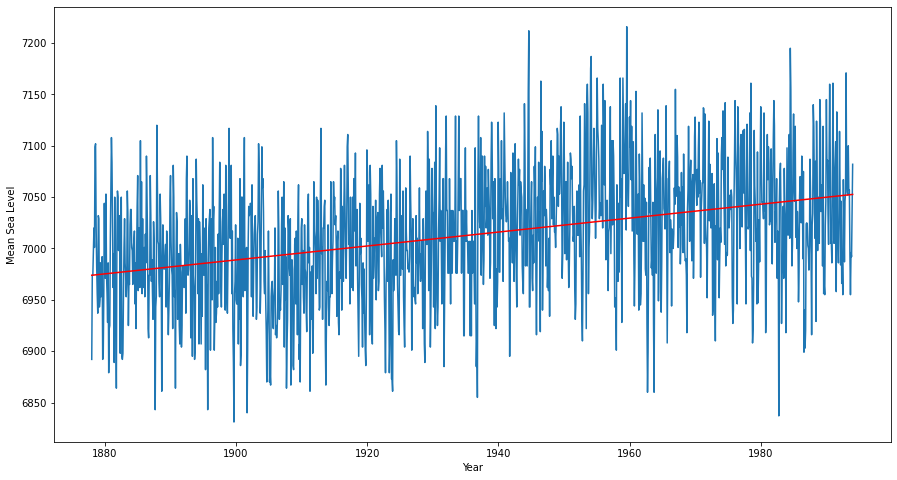

In [6]:
# Use Numpy's polynomial fit function
parameters = np.polyfit(data.index.values, data["sea_level"], deg = 1) #Linear trend is a polynomial of degree 1
(a,b) = parameters
trend = a*data.index.values + b

print(a, b)

f = plt.figure(figsize=(15, 8))
plt.plot(data.index.values, data["sea_level"])
plt.plot(data.index.values,trend, label='Polyfit Trend Line', color ='red')

#plt.legend("Linear fit")
plt.xlabel("Year")
plt.ylabel("Mean Sea Level")
plt.show()

# remember data is given in mm/month so convert estimates to mm/yr

In [4]:
df = pd.read_excel("Sea level data/Mumbai_India.xlsx",
                 usecols=[0, 1],
                 names=["year", "sea_level"])

In [9]:
df.index = pd.to_datetime(df["year"])

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1392 entries, 1970-01-01 00:00:00.000001878 to 1970-01-01 00:00:00.000001993
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   year       1392 non-null   float64
 1   sea_level  1392 non-null   int64  
dtypes: float64(1), int64(1)
memory usage: 32.6 KB


In [11]:
df.index

DatetimeIndex(['1970-01-01 00:00:00.000001878',
               '1970-01-01 00:00:00.000001878',
               '1970-01-01 00:00:00.000001878',
               '1970-01-01 00:00:00.000001878',
               '1970-01-01 00:00:00.000001878',
               '1970-01-01 00:00:00.000001878',
               '1970-01-01 00:00:00.000001878',
               '1970-01-01 00:00:00.000001878',
               '1970-01-01 00:00:00.000001878',
               '1970-01-01 00:00:00.000001878',
               ...
               '1970-01-01 00:00:00.000001993',
               '1970-01-01 00:00:00.000001993',
               '1970-01-01 00:00:00.000001993',
               '1970-01-01 00:00:00.000001993',
               '1970-01-01 00:00:00.000001993',
               '1970-01-01 00:00:00.000001993',
               '1970-01-01 00:00:00.000001993',
               '1970-01-01 00:00:00.000001993',
               '1970-01-01 00:00:00.000001993',
               '1970-01-01 00:00:00.000001993'],
              dtype=

In [12]:
df.head()

,year,sea_level
year,,
1970-01-01 00:00:00.000001878,1878.0416,6892
1970-01-01 00:00:00.000001878,1878.1250,6974
1970-01-01 00:00:00.000001878,1878.2084,6974
1970-01-01 00:00:00.000001878,1878.2916,6998
1970-01-01 00:00:00.000001878,1878.3750,7020


C:\Users\Javed\AppData\Roaming\Python\Python38\site-packages\pandas\plotting\_matplotlib\core.py:1095: UserWarning: Attempting to set identical left == right == 0.0 results in singular transformations; automatically expanding.
  ax.set_xlim(left, right)


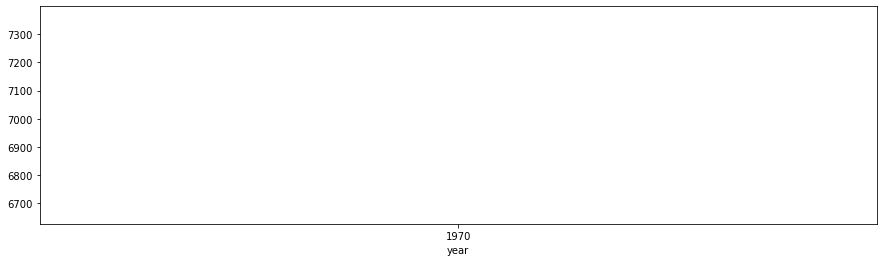

In [15]:
df["sea_level"].resample("1y").mean().plot(figsize=(15,4))